In [2]:
import cvxpy as cvx
import numpy as np
from scipy.linalg import null_space

import matplotlib.pyplot as plt

## External volume inscribed ellipsoid

status: optimal
optimal value 1.9746065752535804
optimal var [[ 2.42822318 -0.05575317]
 [-0.05575317  2.96796993]] [[-0.3392984 ]
 [-0.05615506]]


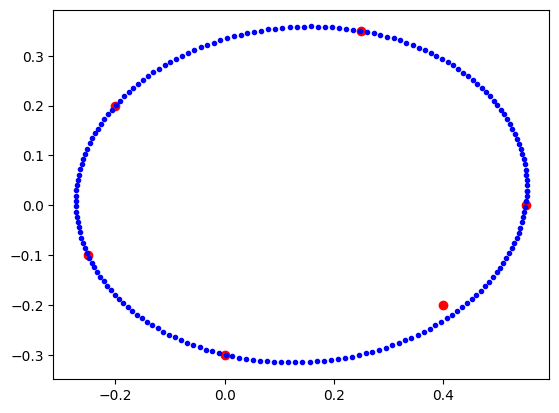

In [3]:
# Generate data
x = np.matrix('''0.55  0.0;
      0.25  0.35;
     -0.2   0.2;
     -0.25 -0.1;
     -0.0  -0.3;
      0.4  -0.2''').T
n, m = x.shape

# Create and solve the model
A = cvx.Variable((n,n), symmetric=True)
b = cvx.Variable((n,1))
# b = cvx.Variable(n)

obj = cvx.Maximize(cvx.log_det(A))
constrs = [cvx.norm(A@x + b@np.ones((1, m)),2, axis=0) <= 1]
prob = cvx.Problem(obj, constrs)
prob.solve(solver=cvx.SCS, verbose=False)

print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", A.value, b.value)


# Plot the results
noangles = 200;
angles = np.linspace(0, 2*np.pi, noangles)
bx = np.vstack((np.cos(angles)- b.value[0], np.sin(angles) - b.value[1]))
ellipse  = np.linalg.solve(A.value, bx)

plt.figure()
plt.plot(x[0], x[1], 'ro')
plt.plot(ellipse[0], ellipse[1], 'b.')
plt.show()

## Maximum volume inscribed ellipsoid

In [4]:
# problem data
n = 2;
px = np.array([0, .5, 2, 3, 1]);
py = np.array([0, 1, 1.5, .5, -.5]);
m = px.shape[0];

pxint = np.sum(px)/m;
pyint = np.sum(py)/m;

px = np.hstack((px, px[0]));
py = np.hstack((py, py[0]));


In [5]:
A = np.array([[-0.8944,    0.4472],
[-0.3162,    0.9487],
[0.7071 ,   0.7071],
[0.4472 ,  -0.8944],
[-0.4472 ,  -0.8944]])

A.shape

b = np.array([0.0000, 0.7906, 2.4749, 0.8944, 0])
b = b.reshape(b.size,1)
b.shape

(5, 1)

status: optimal
optimal value -0.09771939902367055
optimal var [[1.15660123 0.17476059]
 [0.17476059 0.8105167 ]] [[1.3437811 ]
 [0.50000027]]


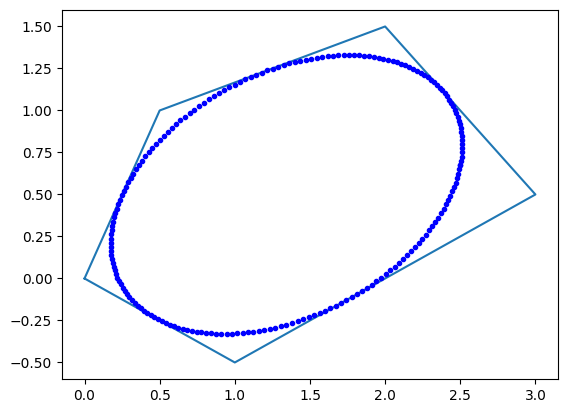

In [9]:
# Create and solve the model
B = cvx.Variable((n,n), symmetric=True)
d = cvx.Variable((n,1))

obj = cvx.Maximize(cvx.log_det(B))

constrs = []
for i in range(m):
    constrs += [cvx.norm(B@A[i,:].T, 2 ) + A[i,:]@d <= b[i]]
    
prob = cvx.Problem(obj, constrs)
prob.solve(solver=cvx.SCS, verbose=False)

print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", B.value, d.value)


# Plot the results
noangles = 200;
angles = np.linspace(0, 2*np.pi, noangles)

ellipse_inner  = np.matmul(B.value , np.vstack(( np.cos(angles) , np.sin(angles)))) + d.value * np.ones((1, noangles));

plt.figure()
plt.plot(px,py)
plt.plot(ellipse_inner[0], ellipse_inner[1], 'b.')
plt.show()


In [10]:
B.value

array([[1.15660123, 0.17476059],
       [0.17476059, 0.8105167 ]])